In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [4]:
(x_train,y_train),(x_test,y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2,seed = 42)

57026/57026 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [5]:
x_train.shape , y_train.shape, x_test.shape, y_test.shape

((404, 13), (404,), (102, 13), (102,))

In [6]:
sc= StandardScaler()

In [7]:
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [10]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape =(13,),name="Input-layer"),
    tf.keras.layers.Dense(100,name="Hidden-layer1"),
    tf.keras.layers.BatchNormalization(name="Hidden-layer2"),
    tf.keras.layers.Dense(50,name="Hidden-layer4"),
    tf.keras.layers.Dense(1,name="Output-layer")
])

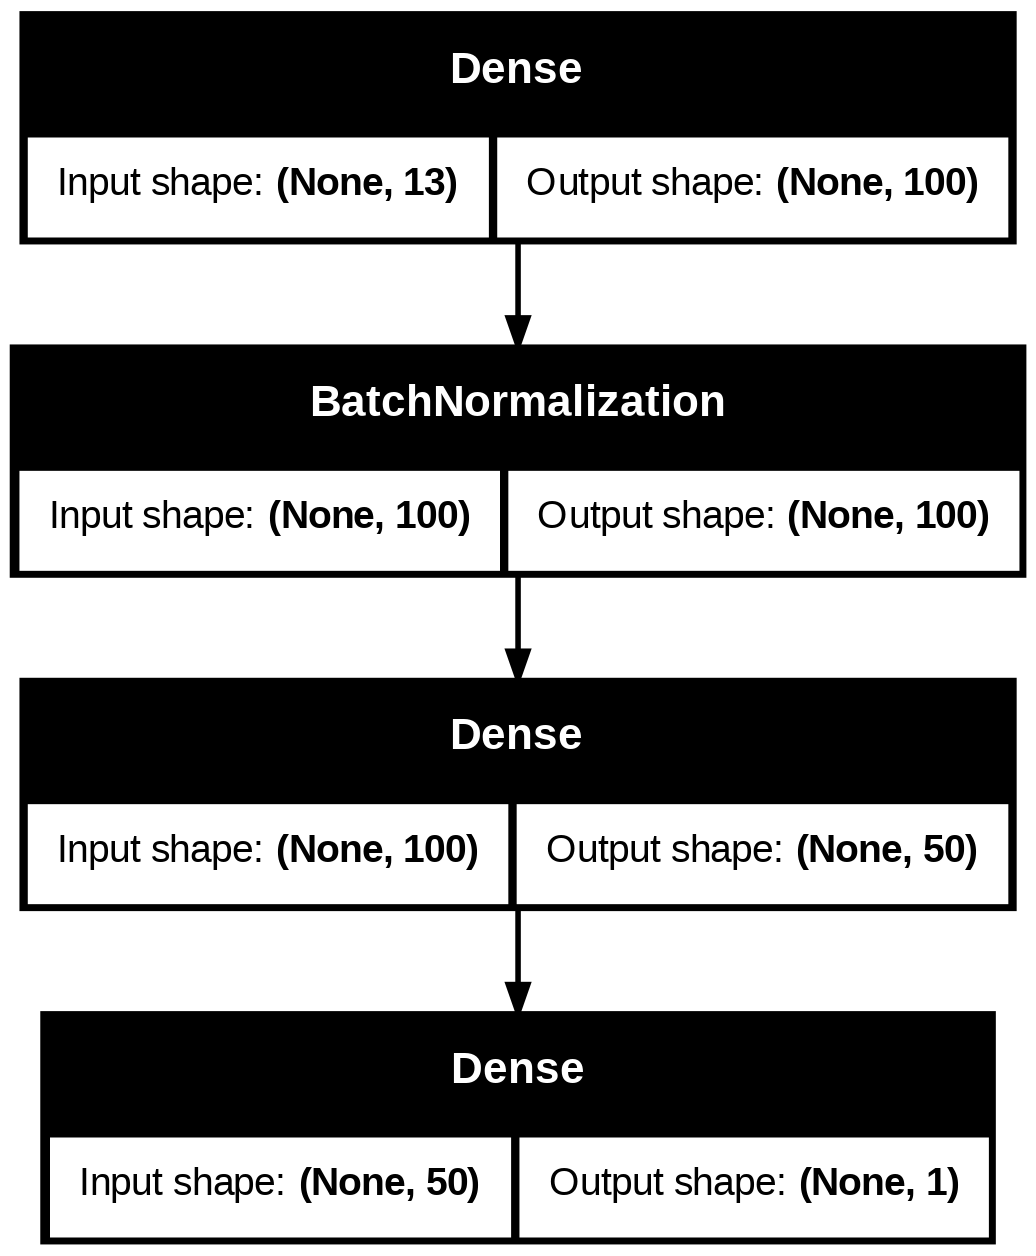

In [11]:
tf.keras.utils.plot_model(model,show_shapes =True)

In [12]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Hidden-layer1 (Dense)           │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer2                   │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden-layer4 (Dense)           │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [13]:
model.compile(
    optimizer="adam",
    loss="mse",
    metrics=["mae"]
)

In [15]:
history = model.fit(x_train,y_train,batch_size=32,epochs=20,validation_data=(x_test,y_test))

Epoch 1/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - loss: 551.1514 - mae: 22.0767 - val_loss: 537.8321 - val_mae: 22.1731
Epoch 2/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 501.9504 - mae: 21.7659 - val_loss: 506.4991 - val_mae: 21.6853
Epoch 3/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 503.4171 - mae: 21.8322 - val_loss: 479.4614 - val_mae: 21.1409
Epoch 4/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 486.7590 - mae: 21.5046 - val_loss: 445.8115 - val_mae: 20.4002
Epoch 5/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 443.1963 - mae: 20.4442 - val_loss: 402.0170 - val_mae: 19.3140
Epoch 6/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 383.3499 - mae: 18.9593 - val_loss: 339.5195 - val_mae: 17.6214
Epoch 7/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 316.4016 - mae: 17.1478 - val_loss: 250.0793 - val_mae: 14.8880
Epoch 8/20
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 222.0764 - mae: 13.9212 - val_loss: 149.1720 - val_mae: 11.0321
Epoch 9/20
13/13 ━━━━

In [16]:
y_pred = model.predict(x_test)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


In [19]:
from sklearn import metrics

In [20]:
def reg(y_test,y_pred):
  print(f"MAE:{metrics.mean_absolute_error(y_test,y_pred)}")
  print(f"MSE:{metrics.mean_squared_error(y_test,y_pred)}")
  print(f"R2-Score:{metrics.r2_score(y_test,y_pred)}")

In [21]:
reg(y_test,y_pred)

MAE:3.2134947552400472
MSE:24.91631305796556
R2-Score:0.6500616702550768
